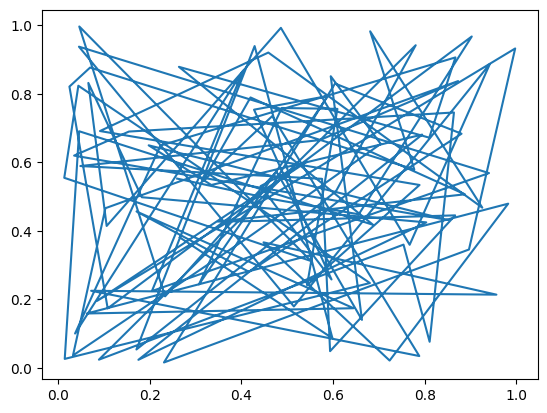

In [2]:
import matplotlib.pyplot as plt
import matplotlib.artist as martist
import numpy as np

fig, ax = plt.subplots()
x, y = np.random.rand(2, 100)
lines = ax.plot(x, y, '-', label='example')
print(lines)

In [3]:
print(ax.get_lines())
print(ax.get_lines()[0])

<a list of 1 Line2D objects>
Line2D(example)


[None, None]

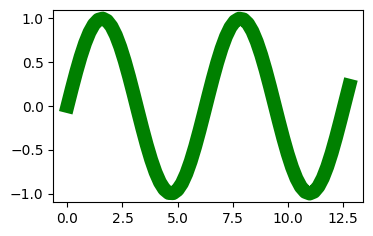

In [4]:
'''
Changing Artist properties
Getting the lines object gives us access to all the properties of the Line2D object. 
So if we want to change the linewidth after the fact, we can do so using Artist.set.
'''
fig, ax = plt.subplots(figsize=(4, 2.5))
x = np.arange(0, 13, 0.2)
y = np.sin(x)
lines = ax.plot(x, y, '-', label='example', linewidth=0.2, color='blue')
lines[0].set(color='green', linewidth=10)

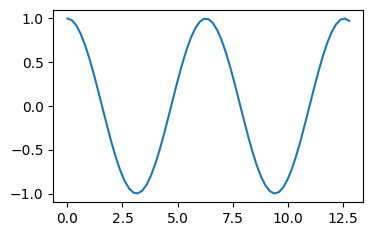

In [5]:
'''
Changing Artist data
In addition to styling properties like color and linewidth, the Line2D object has a data property. 
You can set the data after the line has been created using Line2D.set_data. 
This is often used for Animations, where the same line is shown evolving over time
Most Artists have a usable remove method that will remove the Artist from its Axes list. eg lines[0].remove().
'''
fig, ax = plt.subplots(figsize=(4, 2.5))
x = np.arange(0, 13, 0.2)
y = np.sin(x)
lines = ax.plot(x, y, '-', label='example')
lines[0].set_data([x, np.cos(x)])

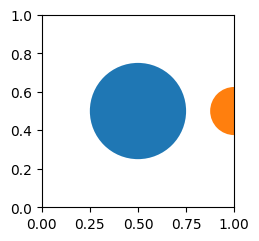

In [6]:
'''
Manually adding Artists
Not all Artists have helper methods, or you may want to use a low-level method for some reason. 
For example the patches.Circle Artist does not have a helper, but we can still create and add to an Axes using the axes.Axes.add_artist method:
'''
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(4, 2.5))
circle = mpatches.Circle((0.5, 0.5), 0.25, ec="none")
ax.add_artist(circle)
clipped_circle = mpatches.Circle((1, 0.5), 0.125, ec="none", facecolor='C1')
ax.add_artist(clipped_circle)
ax.set_aspect(1)

In [8]:
x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')
ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

NameError: name 'cycler' is not defined